In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [6]:
import seaborn as sns

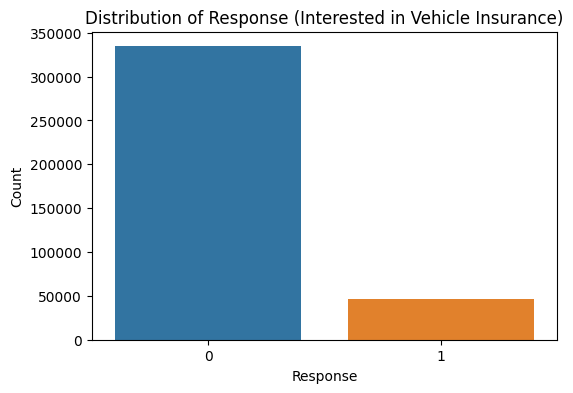

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=df)
plt.title('Distribution of Response (Interested in Vehicle Insurance)')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

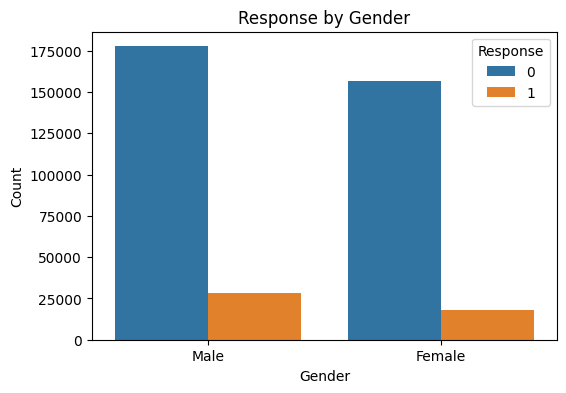

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Response', data=df)
plt.title('Response by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

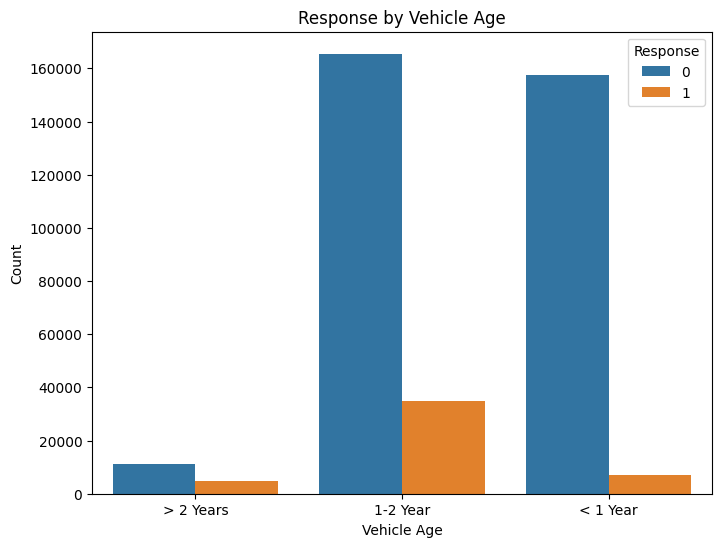

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Vehicle_Age', hue='Response', data=df)
plt.title('Response by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()

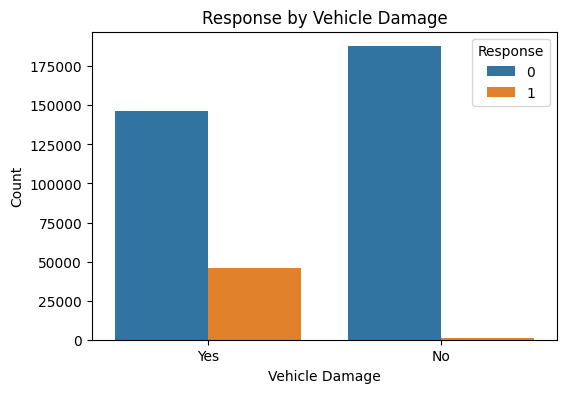

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Vehicle_Damage', hue='Response', data=df)
plt.title('Response by Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

<ipython-input-12-8b12aadc9893>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


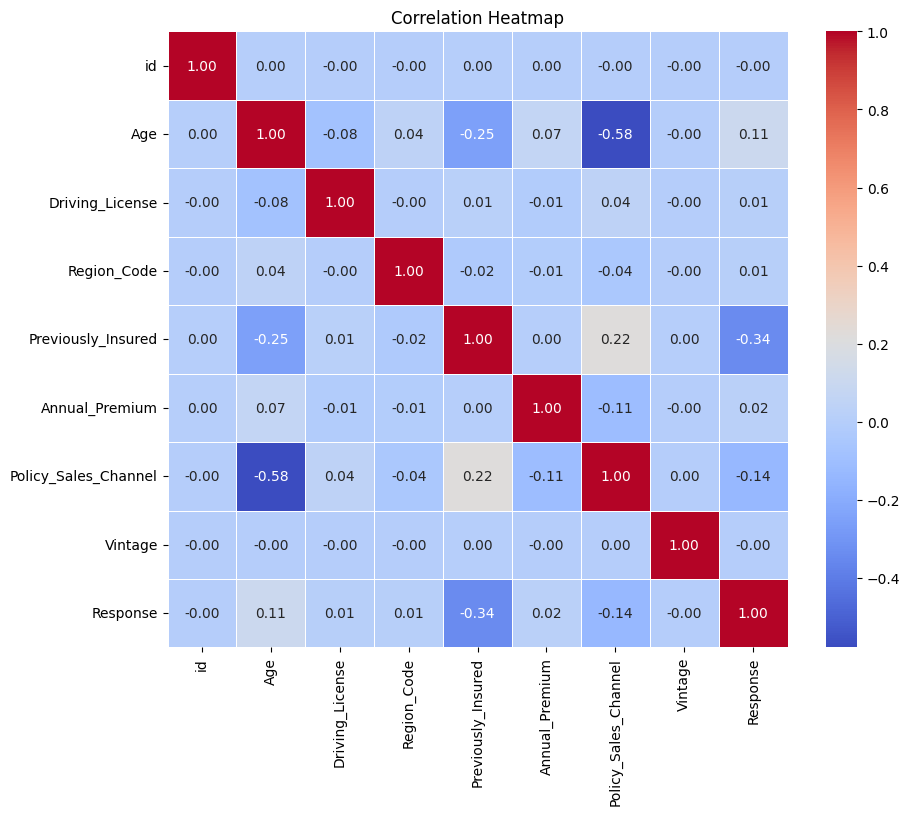

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
print(df.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


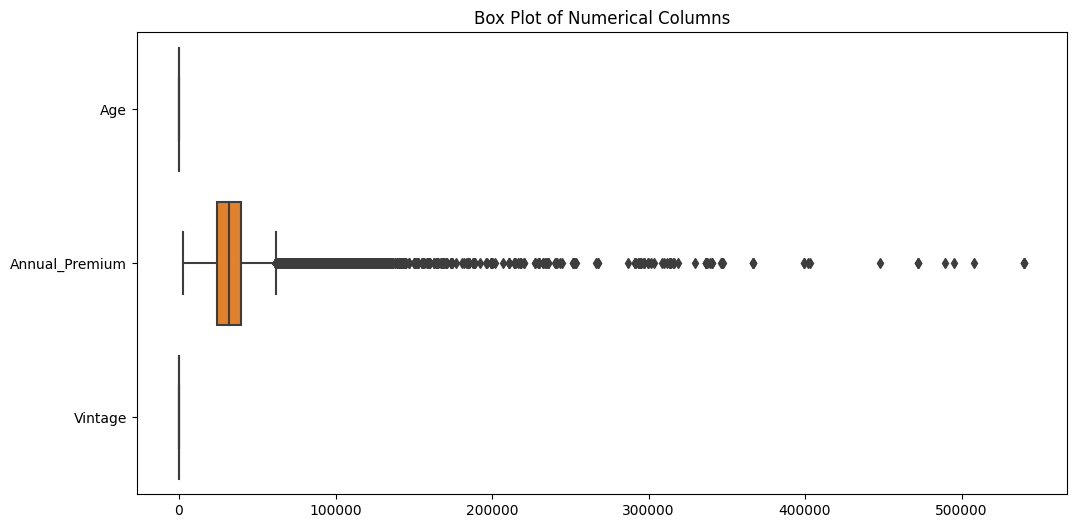

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Annual_Premium', 'Vintage']], orient='h')
plt.title('Box Plot of Numerical Columns')
plt.show()

In [16]:
def handle_outliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
handle_outliers('Age')
handle_outliers('Annual_Premium')
handle_outliers('Vintage')

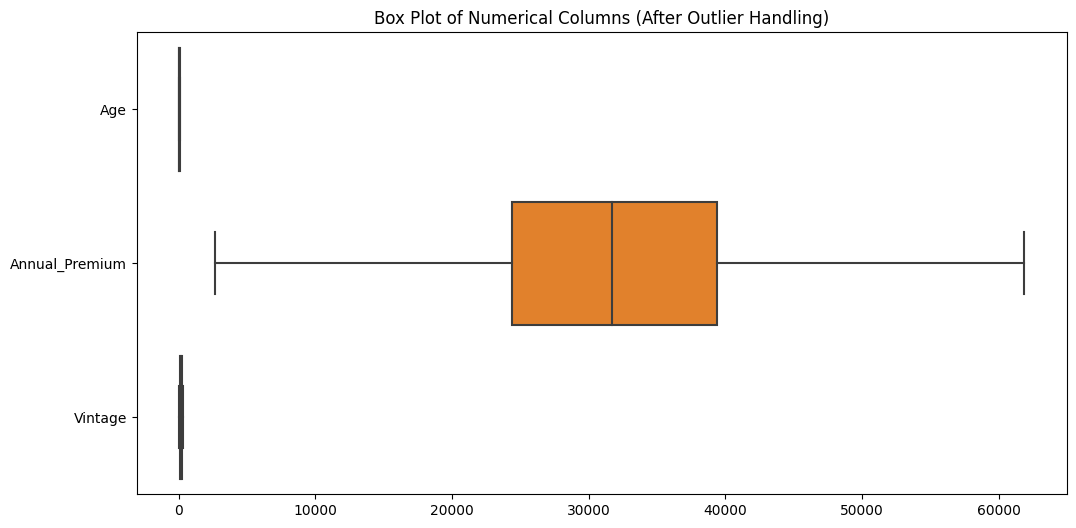

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Annual_Premium', 'Vintage']], orient='h')
plt.title('Box Plot of Numerical Columns (After Outlier Handling)')
plt.show()

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
categorical_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [20]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

X = df_encoded.drop('Response', axis=1)

vif_df = calculate_vif(X)
print(vif_df)

                 Features        VIF
0                      id   3.978344
1                     Age  18.970038
2         Driving_License  56.320372
3             Region_Code   4.956612
4      Previously_Insured   5.750982
5          Annual_Premium   4.874263
6    Policy_Sales_Channel   8.303737
7                 Vintage   4.375200
8             Gender_Male   2.236768
9    Vehicle_Age_< 1 Year   5.148514
10  Vehicle_Age_> 2 Years   1.129170
11     Vehicle_Damage_Yes   6.339528


In [21]:
df_encoded.drop(['Gender_Male', 'Vehicle_Age_< 1 Year'], axis=1, inplace=True)
X = df_encoded.drop('Response', axis=1)
y = df_encoded['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

scaler = MinMaxScaler()

In [24]:
numerical_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium',
                  'Policy_Sales_Channel', 'Vintage']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


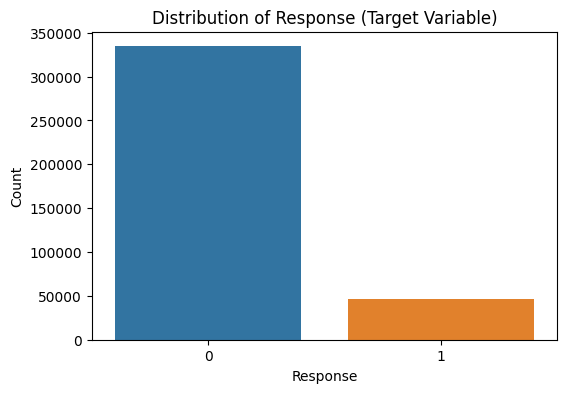

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=df_encoded)
plt.title('Distribution of Response (Target Variable)')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

In [26]:
oversampler = RandomOverSampler(random_state=42)


In [27]:
X = df_encoded.drop('Response', axis=1)
y = df_encoded['Response']


In [28]:
X_resampled, y_resampled = oversampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [30]:
log_reg_model = LogisticRegression(random_state=42)

log_reg_model.fit(X_train, y_train)


y_pred = log_reg_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.50
Confusion Matrix:
[[66775     0]
 [66985     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     66775
           1       0.00      0.00      0.00     66985

    accuracy                           0.50    133760
   macro avg       0.25      0.50      0.33    133760
weighted avg       0.25      0.50      0.33    133760



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [33]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [34]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.96
Confusion Matrix:
[[61085  5690]
 [   88 66897]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     66775
           1       0.92      1.00      0.96     66985

    accuracy                           0.96    133760
   macro avg       0.96      0.96      0.96    133760
weighted avg       0.96      0.96      0.96    133760



In [35]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance_sorted = feature_importance.sort_values(ascending=False)

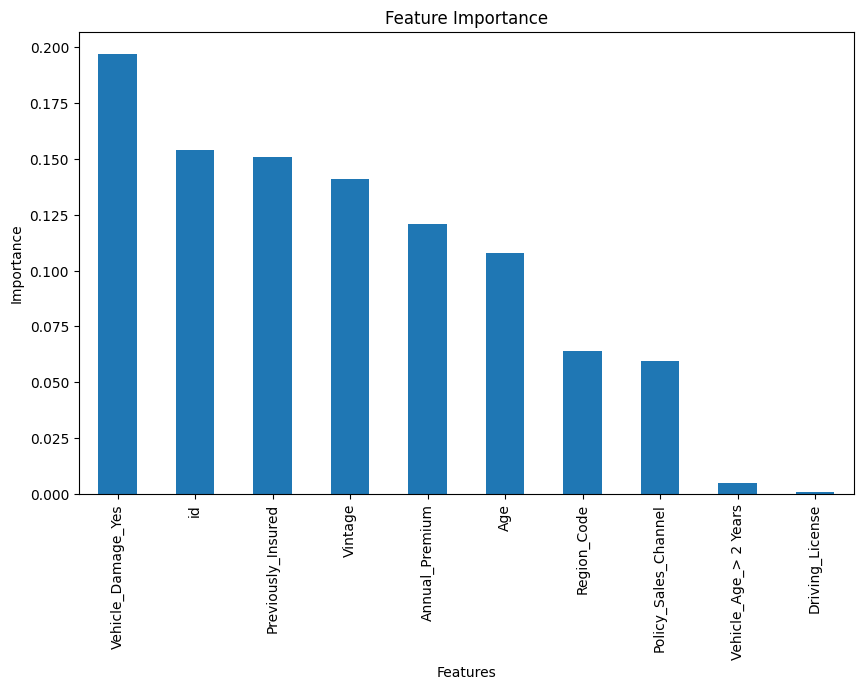

In [36]:
plt.figure(figsize=(10, 6))
feature_importance_sorted.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**Feature Importance and Conclusion**

Based on the feature importance plot, we can draw conclusions about the most influential features.
These features have most significant impact on the model predictions:

1. Vehicle Damage_Yes
2. ID
3. Previously_Insured
4. Vintage

The model suggests that these features play a crucial role in predicting customer interest in vehicle insurance.

For example, customers with older ages might be more interested in vehicle insurance.
Higher annual premiums may indicate customers who are more likely to be interested in better coverage.

Similarly, customers with vehicles aged 1-2 years might have a higher likelihood of showing interest in insurance.

'Vintage' represents the number of days a customer has been associated with the company. It could indicate loyalty or trust.

'Region_Code' could imply that certain geographic regions have a higher probability of showing interest in insurance.

In conclusion, the Random Forest model provides accurate predictions for customer interest in vehicle insurance,and we identified the most influential features that drive these predictions.The model can be a valuable tool for the insurance company to optimize its marketing and business strategies.



